In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
from utils import  *
from scipy.signal import savgol_filter, find_peaks
import seaborn as sns
import plotly.express as px
import pickle

# Visualization of results

In [45]:
results = pd.read_csv('optimizer_batbotV2_2D/data/230828/test1/results.csv')

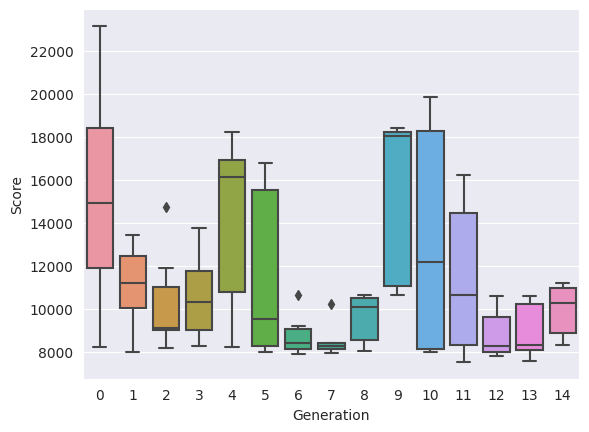

In [50]:
sns.boxplot(results, x='Generation', y='Score')
plt.show()

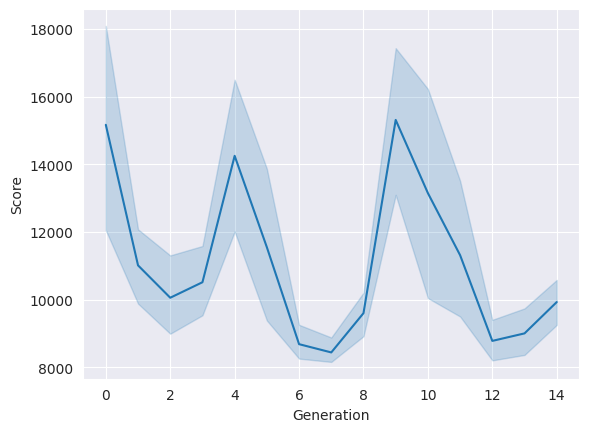

In [49]:
sns.lineplot(results, x='Generation', y='Score')
plt.show()

In [36]:
#res = results.copy()
#res.Score = res.Score - res.Score.min()

In [48]:
results = results.drop_duplicates()

In [41]:
fig = px.scatter_3d(results, x='Motor', y='Attack', z='Score', color='Generation', hover_data='Id' )
fig.write_html('optimizer_batbotV2_2D/data/230828/test1/results.html')

# Measurements visualization

In [42]:
results = pd.read_csv('data/230828/test1/results.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/230828/test1/results.csv'

In [6]:
sns.lineplot(results,x='timestamp',y=sensors_col)

ValueError: Could not interpret value `timestamp` for parameter `x`

In [ ]:
results = pd.read_csv('data/230711/0_4.csv')
px.line(results,x='timestamp',y=sensors_col)